# Data explorations emigration: image measures

In this sheet we will explore the possibilities to come to a reasonably typology of the density of the images

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/rikhoekstra/surfdrive/emigratie/alledges.csv')
#give it a url for later use. This might be possible in one line, but I'll settle for two
df['url'] = df.file.str.split('_').str.get(-2)
df['url'] = df.url.apply(lambda x: "https://migrantcards.huygens.knaw.nl/cards/%(number)02d/" % {"number":int(x)})
df.head()

,file,edges,url
0,NL-HaNA_2.05.159_1_0191.jpg,1152.0,https://migrantcards.huygens.knaw.nl/cards/01/
1,NL-HaNA_2.05.159_1_1329.jpg,1276.0,https://migrantcards.huygens.knaw.nl/cards/01/
2,NL-HaNA_2.05.159_1_0181.jpg,784.0,https://migrantcards.huygens.knaw.nl/cards/01/
3,NL-HaNA_2.05.159_1_2221.jpg,2453.0,https://migrantcards.huygens.knaw.nl/cards/01/
4,NL-HaNA_2.05.159_1_1912.jpg,1277.0,https://migrantcards.huygens.knaw.nl/cards/01/


In [3]:
df.loc[df.edges.isnull()]

,file,edges,url
65526,NL-HaNA_2.05.159_31_032,NaN,https://migrantcards.huygens.knaw.nl/cards/31/
91270,NL-HaNA_2.05.159_42_0438.j,NaN,https://migrantcards.huygens.knaw.nl/cards/42/


In [4]:
x = df.file.str.rpartition('_')
x = x[2].str.split('.', expand=True)



In [5]:
# split to even and odd, as odd imagenrs are the front of the cards and even nrs the back
# and it is very likely these have different characteristics
# we will not rely on pandas index nrs but use the image

even_edges = df.iloc[x.loc[x[0].astype('int64') % 2 ==0 ].index].copy()
odd_edges = df.iloc[x.loc[x[0].astype('int64') % 2 !=0 ].index].copy()
odd_edges.head(10)

# we make them separate dataframes for further processing




,file,edges,url
0,NL-HaNA_2.05.159_1_0191.jpg,1152.0,https://migrantcards.huygens.knaw.nl/cards/01/
1,NL-HaNA_2.05.159_1_1329.jpg,1276.0,https://migrantcards.huygens.knaw.nl/cards/01/
2,NL-HaNA_2.05.159_1_0181.jpg,784.0,https://migrantcards.huygens.knaw.nl/cards/01/
3,NL-HaNA_2.05.159_1_2221.jpg,2453.0,https://migrantcards.huygens.knaw.nl/cards/01/
6,NL-HaNA_2.05.159_1_1399.jpg,1089.0,https://migrantcards.huygens.knaw.nl/cards/01/
8,NL-HaNA_2.05.159_1_0399.jpg,1056.0,https://migrantcards.huygens.knaw.nl/cards/01/
15,NL-HaNA_2.05.159_1_0283.jpg,1728.0,https://migrantcards.huygens.knaw.nl/cards/01/
16,NL-HaNA_2.05.159_1_0723.jpg,347.0,https://migrantcards.huygens.knaw.nl/cards/01/
18,NL-HaNA_2.05.159_1_1739.jpg,1080.0,https://migrantcards.huygens.knaw.nl/cards/01/
19,NL-HaNA_2.05.159_1_0389.jpg,1473.0,https://migrantcards.huygens.knaw.nl/cards/01/


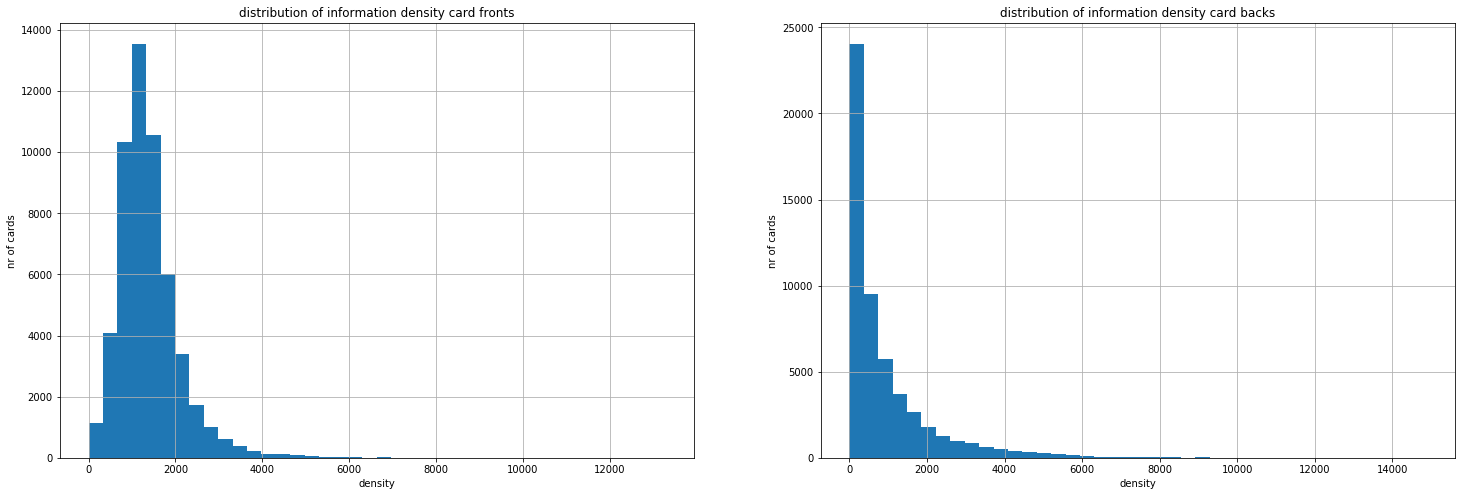

In [6]:
#the histogram code inspired by https://stackoverflow.com/questions/38451407/numpy-pandas-return-histogram-values-from-pandas-histogram-plot

fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
ax1.set_title("distribution of information density card fronts")
ax1.set_xlabel('density')
ax1.set_ylabel('nr of cards')
odd_edges.edges.hist(bins=40,ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_title("distribution of information density card backs")
ax2.set_xlabel('density')
#ax2.set_xscale('symlog')
#ax2.set_yscale('symlog')
ax2.set_ylabel('nr of cards')
even_edges.edges.hist(bins=40, ax=ax2)

There is (indeed) a marked difference between the information distribution of the front and the back of the cards. Let's see if we can determine the distribution

/Users/rikhoekstra/anaconda/envs/36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


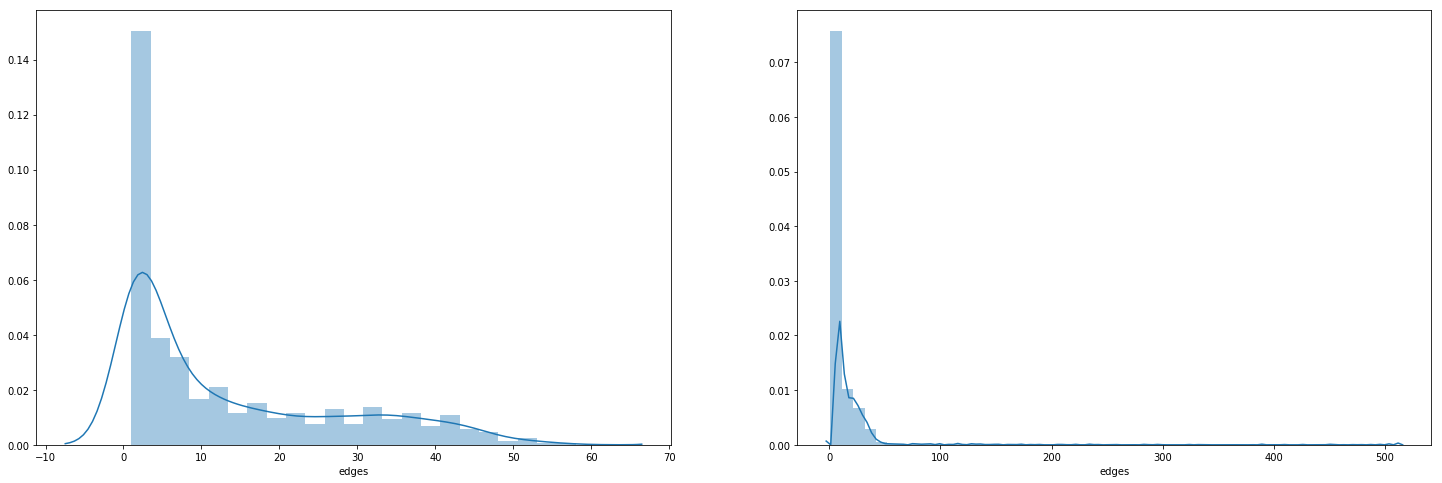

In [7]:
d_e = even_edges.edges.value_counts()
d_o = odd_edges.edges.value_counts()
fig = plt.figure(figsize=(25, 8))
ax1 = fig.add_subplot(121)
sns.distplot(d_o, ax=ax1)
ax2 = fig.add_subplot(122)
sns.distplot(d_e, ax=ax2)

In [8]:
# determine categories using bins
# for card backs
pd.cut(even_edges.edges, 20).value_counts() # lets see what dividing into 20 bins gives us 

(-14.866, 743.3]      33546
(743.3, 1486.6]        9471
(1486.6, 2229.9]       4421
(2229.9, 2973.2]       2276
(2973.2, 3716.5]       1495
(3716.5, 4459.8]        933
(4459.8, 5203.1]        561
(5203.1, 5946.4]        345
(5946.4, 6689.7]        191
(6689.7, 7433.0]        101
(7433.0, 8176.3]         69
(8176.3, 8919.6]         33
(8919.6, 9662.9]         30
(9662.9, 10406.2]        14
(11149.5, 11892.8]       13
(10406.2, 11149.5]        8
(11892.8, 12636.1]        4
(12636.1, 13379.4]        3
(14122.7, 14866.0]        2
(13379.4, 14122.7]        1
Name: edges, dtype: int64

In [9]:
# determine categories using bins
# and for card fronts
pd.cut(odd_edges.edges, 30).value_counts()

(884.467, 1326.7]         17523
(1326.7, 1768.933]        12950
(442.233, 884.467]         9526
(1768.933, 2211.167]       6098
(2211.167, 2653.4]         2630
(-13.267, 442.233]         2043
(2653.4, 3095.633]         1228
(3095.633, 3537.867]        655
(3537.867, 3980.1]          340
(3980.1, 4422.333]          174
(4422.333, 4864.567]        134
(4864.567, 5306.8]           68
(5306.8, 5749.033]           39
(5749.033, 6191.267]         27
(6191.267, 6633.5]           21
(6633.5, 7075.733]           15
(7075.733, 7517.967]          8
(7517.967, 7960.2]            5
(7960.2, 8402.433]            4
(9286.9, 9729.133]            4
(9729.133, 10171.367]         4
(10171.367, 10613.6]          2
(11055.833, 11498.067]        2
(11498.067, 11940.3]          2
(8402.433, 8844.667]          1
(8844.667, 9286.9]            1
(11940.3, 12382.533]          1
(12824.767, 13267.0]          1
(12382.533, 12824.767]        0
(10613.6, 11055.833]          0
Name: edges, dtype: int64

In [10]:
# define cut ups here, so that we can change them centrally
# this seems to be a reasonable cut up. 
# After visual inspection I changed the emplty to a lower value but more adjusting may be done
# change cut values here!
odd_cuts = [0, 200, 800, 1200, 1600, 2000, even_edges.edges.max()]
even_cuts = [0, 200, 400, 800, 1600, 2500, even_edges.edges.max()]
labelled = ['empty','small', 'medium-sm','medium-l','large','dense']

In [11]:
fronts = pd.cut(odd_edges.edges, odd_cuts, labels=labelled).value_counts()
fronts.sort_index(inplace=True)
fronts

empty          518
small         8238
medium-sm    15182
medium-l     14204
large         7647
dense         7710
Name: edges, dtype: int64

In [12]:

backs = pd.cut(even_edges.edges, even_cuts, labels=labelled).value_counts()
backs


empty        18365
medium-sm     9670
medium-l      9308
small         6570
dense         5087
large         4507
Name: edges, dtype: int64

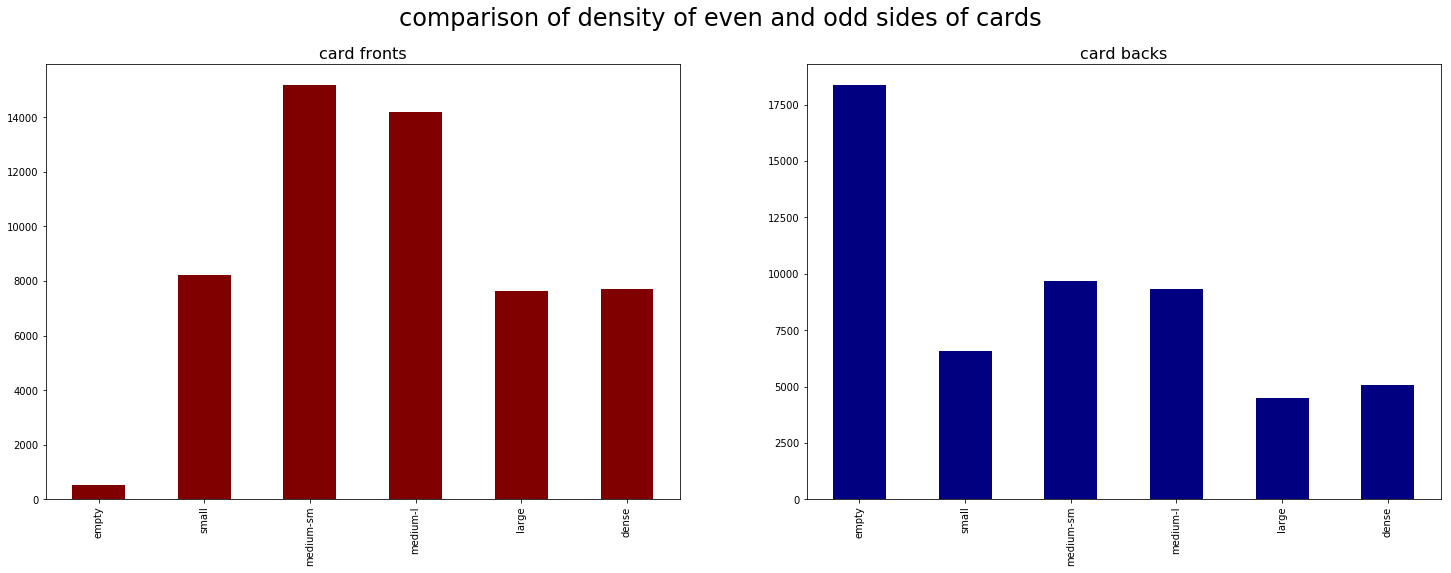

In [13]:
d_e = even_edges.edges.value_counts()
d_o = odd_edges.edges.value_counts()
fig = plt.figure(figsize=(25, 8))
fig.suptitle("comparison of density of even and odd sides of cards", fontsize="24")
ax1 = fig.add_subplot(121)
ax1.set_title("card fronts", fontsize="16")
fronts.sort_index().plot.bar(color='maroon', ax=ax1)
ax2 = fig.add_subplot(122)
ax2.set_title("card backs", fontsize="16")
backs.sort_index().plot.bar(color='navy', ax=ax2)

#except for some more formatting and getting rid of the fancy colors

## Analysis 

This seems a reasonable division of the images between (from small to large 'bin'):

* empty
* sparse 
* medium small
* medium large
* full
* dense

But does this actually respond to reasonable comparable cards. We have to check this by inspecting sample cards, but will do that in separate files. (For publication services we will have to blur the cards, but not in this stage of the research). This also provides a form of visual feedback for researchers, allowing for forms of scalable reading

In [25]:

odd_edges['density'] = pd.cut(odd_edges.edges, odd_cuts, 
                              labels=labelled)
odd_edges.head()
#ronts.sample(n=30, axis=index[0])


,file,edges,url,density
0,NL-HaNA_2.05.159_1_0191.jpg,1152.0,https://migrantcards.huygens.knaw.nl/cards/01/,medium-sm
1,NL-HaNA_2.05.159_1_1329.jpg,1276.0,https://migrantcards.huygens.knaw.nl/cards/01/,medium-l
2,NL-HaNA_2.05.159_1_0181.jpg,784.0,https://migrantcards.huygens.knaw.nl/cards/01/,small
3,NL-HaNA_2.05.159_1_2221.jpg,2453.0,https://migrantcards.huygens.knaw.nl/cards/01/,dense
6,NL-HaNA_2.05.159_1_1399.jpg,1089.0,https://migrantcards.huygens.knaw.nl/cards/01/,medium-sm


In [23]:
even_edges['density'] = pd.cut(even_edges.edges, even_cuts,
                               labels=labelled)
# and we'll give the set a url as well
even_edges.head()

,file,edges,url,density
4,NL-HaNA_2.05.159_1_1912.jpg,1277.0,https://migrantcards.huygens.knaw.nl/cards/01/,medium-l
5,NL-HaNA_2.05.159_1_1184.jpg,815.0,https://migrantcards.huygens.knaw.nl/cards/01/,medium-l
7,NL-HaNA_2.05.159_1_1470.jpg,8.0,https://migrantcards.huygens.knaw.nl/cards/01/,empty
9,NL-HaNA_2.05.159_1_1966.jpg,335.0,https://migrantcards.huygens.knaw.nl/cards/01/,small
10,NL-HaNA_2.05.159_1_0344.jpg,1109.0,https://migrantcards.huygens.knaw.nl/cards/01/,medium-l


In [30]:
# and make samples for inspection
import pathlib
 
    
flin = open('contactsheet_template.html')
HTMLtemplate = flin.read()
flin.close()

htmloutdir = './htmlout/'
def samples_out(outdir, dataframe, cut, htmloutdir=htmloutdir):
    outdr = os.path.join(htmloutdir, outdir)
    pathlib.Path(outdr).mkdir(parents=True, exist_ok=True)
    df = globals()[dataframe]
    cut = globals()[cut]
    for item in labelled:
        temp = df.loc[df.density == item]
        try:
            csv_sample = temp.sample(100)
        except ValueError:
            print(df)
            print(cut)
        outflname = os.path.join(outdr, item)
        csv_sample.to_csv(outflname + '.csv')
        htmlout = open(outflname + '.html', 'w')
        htmlout.write(HTMLtemplate % (item + '.csv',))
        htmlout.close()

for i in ['even','odd']:
    samples_out(i, '%s_edges' % i, '%s_cuts' % i)
    

,file,edges,url
0,NL-HaNA_2.05.159_1_0191.jpg,1152.0,https://migrantcards.huygens.knaw.nl/cards/01/
1,NL-HaNA_2.05.159_1_1329.jpg,1276.0,https://migrantcards.huygens.knaw.nl/cards/01/
2,NL-HaNA_2.05.159_1_0181.jpg,784.0,https://migrantcards.huygens.knaw.nl/cards/01/
3,NL-HaNA_2.05.159_1_2221.jpg,2453.0,https://migrantcards.huygens.knaw.nl/cards/01/
4,NL-HaNA_2.05.159_1_1912.jpg,1277.0,https://migrantcards.huygens.knaw.nl/cards/01/
5,NL-HaNA_2.05.159_1_1184.jpg,815.0,https://migrantcards.huygens.knaw.nl/cards/01/
6,NL-HaNA_2.05.159_1_1399.jpg,1089.0,https://migrantcards.huygens.knaw.nl/cards/01/
7,NL-HaNA_2.05.159_1_1470.jpg,8.0,https://migrantcards.huygens.knaw.nl/cards/01/
8,NL-HaNA_2.05.159_1_0399.jpg,1056.0,https://migrantcards.huygens.knaw.nl/cards/01/
9,NL-HaNA_2.05.159_1_1966.jpg,335.0,https://migrantcards.huygens.knaw.nl/cards/01/


## Analysis

In the generate files, there is an overview of samples (100 images randomly sampled per density type, fronts ('odd') and back ('even')) from the different densities. This is __not__ acomplete overview, but a visual aid for making a resonable typology of cards.

It is a first attempt to get insight if we can associate densities with 'typical' cards. This needs a lot more tweeking. Perhaps we should also consider cutting up the cards into regions, as there is different types of information on the different regions of the cards, mainly on the front of the cards. And the different models offer some template for this that we explore. 


But now we first try and apply this to the sample to see if this can bring some more refinements. In another notebook.


In [ ]:
odd_edges.to_csv("csvs/odd_edges.csv")
even_edges.to_csv("csvs/even_edges.csv")